Populating the interactive namespace from numpy and matplotlib
You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.

<type 'dict'>
['__call__', '__class__', '__cmp__', '__delattr__', '__doc__', '__format__', '__func__', '__get__', '__getattribute__', '__hash__', '__init__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__self__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'im_class', 'im_func', 'im_self']
10001
10001
10001
10001
[  0.00000000e+00   1.00622611e-31   6.03817211e-31   1.81172054e-30
   4.02666396e-30   7.55117238e-30   1.26879633e-29   1.97399460e-29
   2.90102201e-29   4.08020750e-29]
[  6.46187265e-27   6.85570418e-27   7.26525561e-27   7.69083713e-27
   8.13275904e-27   8.59133182e-27   9.06686603e-27   9.55967235e-27
   1.00700615e-26   1.05983444e-26]
5001
5001
[ -0.00000000e+00  -4.56230844e-28  -1.96620759e-27  -4.74195428e-27
  -8.99562037e-27  -1.49

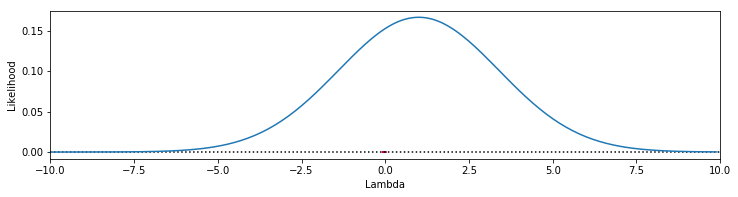

Populating the interactive namespace from numpy and matplotlib
You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
<type 'dict'>
['__call__', '__class__', '__cmp__', '__delattr__', '__doc__', '__format__', '__func__', '__get__', '__getattribute__', '__hash__', '__init__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__self__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'im_class', 'im_func', 'im_self']
10001
10001
10001
10001
[  0.00000000e+00   1.00622611e-32   6.03817211e-32   1.81172054e-31
   4.02666396e-31   7.55117238e-31   1.26879633e-30   1.97399460e-30
   2.90102201e-30   4.08020750e-30]
[  6.46187265e-28   6.85570418e-28   7.26525561e-28   7.69083713e-28
   8.13275904e-28   8.59133182e-28   9.06686603e-28   9.55967235e-28
   1.00700615e-27   1.05983444e-27]
5001
5001
[ -0.00000000e+00  -4.56230844e-29  -1.96620759e-28  -4.74195428e-28
  -8.99562037e-28  -1.493

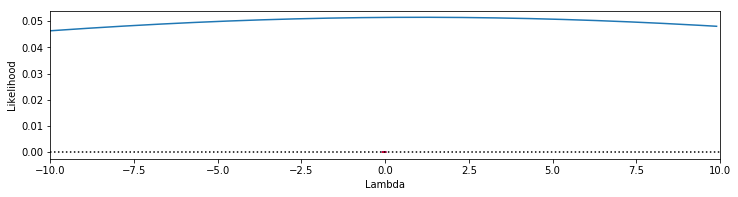

Populating the interactive namespace from numpy and matplotlib
You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
<type 'dict'>
['__call__', '__class__', '__cmp__', '__delattr__', '__doc__', '__format__', '__func__', '__get__', '__getattribute__', '__hash__', '__init__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__self__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'im_class', 'im_func', 'im_self']
10001
10001
10001
10001
[  0.00000000e+00   5.03113053e-33   3.01908605e-32   9.05860271e-32
   2.01333198e-31   3.77558619e-31   6.34398167e-31   9.86997298e-31
   1.45051100e-30   2.04010375e-30]
[  3.23093633e-28   3.42785209e-28   3.63262781e-28   3.84541856e-28
   4.06637952e-28   4.29566591e-28   4.53343301e-28   4.77983618e-28
   5.03503076e-28   5.29917219e-28]
5001
5001
[ -0.00000000e+00  -2.28115422e-29  -9.83103797e-29  -2.37097714e-28
  -4.49781019e-28  -7.469

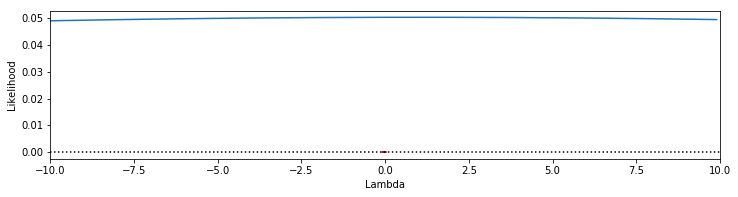

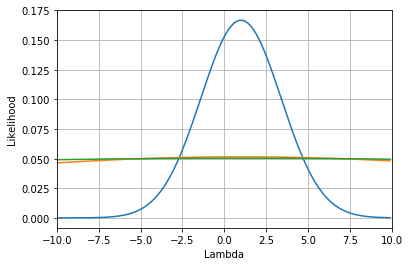

In [2]:
mass = [60, 60, 60]
dist2 = [5, 50, 100]

def LambdaPeakGraph (mass, dist):
    %pylab inline
    %config Inline.Backend.figure_format = 'retina'

    #from __future__ import division, print_function
    import gwmemory
    !pip install lalsuite 

    from pycbc import catalog
    from pycbc.waveform import get_td_waveform, get_fd_waveform
    from pycbc.waveform import td_approximants, fd_approximants
    from pycbc.fft import fft

    import numpy as np
    import scipy as sp
    import pylab
    from scipy.fftpack import fft, rfft

    %matplotlib inline
    import matplotlib.pyplot as plt
    import matplotlib.mlab as mlab
    from pycbc.filter import resample_to_delta_t, highpass
    from pycbc.catalog import Merger
    from pycbc.psd import interpolate, inverse_spectrum_truncation
    from pycbc.waveform import get_td_waveform
    from pycbc.filter.matchedfilter import match

    from scipy import signal
    from scipy.signal import butter, filtfilt, iirdesign, zpk2tf, freqz
    import h5py
    import json
    import matplotlib.lines as mlines

    def InnerProduct(a, b, Sn, df):

        b_conj = np.conjugate(b)

        integrand = []

        for i in range(0,len(a)):
            intgrnd = a[i]*b_conj[i]/Sn[i]
            integrand.append(intgrnd)

        result_complex = 4*np.sum(integrand)*df

        result = np.real(result_complex)

        return result
    
    
    def LogLikelihood(data, h_theta, Sn, df):

        h_minus_d = h_theta - data

        term = (-1.0/2)*InnerProduct(h_minus_d, h_minus_d, Sn, df)

        result = (term)

        return result
    
  
      #In order to generate the memory we necessarily generate the time-domain oscillatory waveform
    q = 1.
    S1 = [0., 0., 0.]
    S2 = [0., 0., 0.]

    times = np.linspace(-0.08, 0.02, 10001)
    #times = np.linspace(-0.98, .01, 10000)
    surr = gwmemory.waveforms.Surrogate(q=q, S1=S1, S2=S2, MTot = mass, distance = dist, times=times)



    inc = np.pi / 2
    pol = 0

    oscillatory, times = surr.time_domain_oscillatory(inc=inc, pol=pol)
    memory, times = surr.time_domain_memory(inc=inc, pol=pol)

    fig = figure(figsize=(12, 6))
    fig.add_subplot(2, 1, 1)
    plot(times, oscillatory['plus'], linestyle='--', color='b', alpha=0.5)
    plot(times, oscillatory['cross'], linestyle='--', color='r', alpha=0.5)
    plot(times, memory['plus'], linestyle='-.', color='b', alpha=0.5)
    plot(times, memory['cross'], linestyle='-.', color='r', alpha=0.5)
    plot(times, oscillatory['plus'] + memory['plus'], color='b')
    plot(times, oscillatory['cross'] + memory['cross'], color='r')
    axhline(0, linestyle=':', color='k')
    xlim(-0.08, 0.02)

    print (type (oscillatory))

    print (dir(surr.time_domain_oscillatory))

    print (len(times))

    print (times.size)


   # tight_layout()
    #show()
    #close()
    
    
    mem_plus = memory['plus']
    dt = times[1] - times[0]
    window = signal.tukey(len(mem_plus))
    win_mem= window*mem_plus
    print (len(win_mem))
    print(len(times))
    freq_mem = np.fft.rfft(win_mem)*dt

    dt = times[1] - times[0]
    #print (help(np.fft.fftfreq))
    fft_mem = np.fft.rfftfreq (len(win_mem),dt)                            
    print (win_mem[0:10])
    print (win_mem[50:60])
    print (len(freq_mem))
    print (len(fft_mem))



    osci_plus = oscillatory['plus']
    window = signal.tukey(len(osci_plus))
    win_osc= window*osci_plus
    freq_osc = np.fft.rfft(win_osc)*dt

    fft_osc = np.fft.rfftfreq(len(win_osc), dt)                            
    print (win_osc[0:10])
    print (win_osc[50:60])
    print (len(fft_osc))
    print (len(freq_osc))
    
    
    s = freq_osc + freq_mem

        #Making psd 
    merger = Merger("GW150914")
    
   
    # Get the data from the Hanford detector
    strain = merger.strain('H1')
    df = strain.delta_f
    psd = strain.psd(4)
    asd = np.sqrt(psd)
    asd_freqs = psd.sample_frequencies

        ##Interpolating to make  memory and oscillatory component (in freq domain) and PSD equal. This will line them up
    from scipy.interpolate import interp1d
    sampfreq = 4096
    datafreq = np.fft.fftfreq(freq_osc.size)*sampfreq
    interpolate_psd = np.interp(datafreq, asd_freqs, psd)

    #Template, adding in the lambda component. Will store log likelihood of the template
    lambda_arr = np.arange(-10,10,.1)
    like_arr = []
    for weight in lambda_arr:
        h_trial = freq_osc + weight*freq_mem
        like_trial = LogLikelihood(s, h_trial, interpolate_psd, df)
        like_arr.append(like_trial)
        
    import numpy as np
    from numpy import asarray
    #Normalizing the Likelihood array
    likelihood1 = np.exp(asarray(like_arr))
    Normal = likelihood1.sum()*.1
    Norm = likelihood1/Normal
    print (Normal)
    print (Norm)


    #Plotting the normalized likelihood array
    x = lambda_arr 
    y = Norm
    #pylab.semilogy(x,y) 
    pylab.plot(x,y)
    pylab.xlim(-10, 10, 0.01)
    pylab.xlabel('Lambda')
    #pylab.ylim(-.00,, 0.001)
    pylab.ylabel('Likelihood')
    #plt.title("Likelihood for 60 solar massess and 5 megaparsecs", y=1.08)

    pylab.show() 
    
    return Norm
    
    
#for i in range(3):
    #LambdaPeakGraph(mass[i], dist[i])

import numpy as np   
Likelihood_dict = {}

for i in np.arange(3):
    Likelihood = LambdaPeakGraph(mass[i], dist2[i])
    key = ((mass[i]), (dist2[i]))
    Likelihood_dict[key] = Likelihood       

lambda_arr = np.arange(-10,10,.1)     
for key, value in Likelihood_dict.items():
   
    
    
    x = lambda_arr 
    y = value
    #pylab.semilogy(x,y) 
    pylab.plot(x,y)
pylab.xlim(-10, 10, 0.01)
pylab.xlabel('Lambda')
#pylab.ylim(-.00,, 0.001)
pylab.ylabel('Likelihood')
pylab.grid()
    

In [7]:
print(Likelihood_dict)

{(60, 5): array([  4.36175424e-06,   5.27949657e-06,   6.37920368e-06,
         7.69454709e-06,   9.26493317e-06,   1.11363829e-05,
         1.33625289e-05,   1.60057414e-05,   1.91383976e-05,
         2.28443067e-05,   2.72203077e-05,   3.23780518e-05,
         3.84459887e-05,   4.55715700e-05,   5.39236875e-05,
         6.36953623e-05,   7.51066995e-05,   8.84081250e-05,
         1.03883917e-04,   1.21856049e-04,   1.42688346e-04,
         1.66790976e-04,   1.94625273e-04,   2.26708892e-04,
         2.63621308e-04,   3.06009636e-04,   3.54594775e-04,
         4.10177843e-04,   4.73646899e-04,   5.45983900e-04,
         6.28271863e-04,   7.21702187e-04,   8.27582061e-04,
         9.47341912e-04,   1.08254279e-03,   1.23488361e-03,
         1.40620818e-03,   1.59851181e-03,   1.81394750e-03,
         2.05483150e-03,   2.32364807e-03,   2.62305337e-03,
         2.95587822e-03,   3.32512965e-03,   3.73399100e-03,
         4.18582036e-03,   4.68414728e-03,   5.23266744e-03,
         5.835

In [3]:
arr1 = ([  4.36175424e-06,   5.27949657e-06,   6.37920368e-06,
         7.69454709e-06,   9.26493317e-06,   1.11363829e-05,
         1.33625289e-05,   1.60057414e-05,   1.91383976e-05,
         2.28443067e-05,   2.72203077e-05,   3.23780518e-05,
         3.84459887e-05,   4.55715700e-05,   5.39236875e-05,
         6.36953623e-05,   7.51066995e-05,   8.84081250e-05,
         1.03883917e-04,   1.21856049e-04,   1.42688346e-04,
         1.66790976e-04,   1.94625273e-04,   2.26708892e-04,
         2.63621308e-04,   3.06009636e-04,   3.54594775e-04,
         4.10177843e-04,   4.73646899e-04,   5.45983900e-04,
         6.28271863e-04,   7.21702187e-04,   8.27582061e-04,
         9.47341912e-04,   1.08254279e-03,   1.23488361e-03,
         1.40620818e-03,   1.59851181e-03,   1.81394750e-03,
         2.05483150e-03,   2.32364807e-03,   2.62305337e-03,
         2.95587822e-03,   3.32512965e-03,   3.73399100e-03,
         4.18582036e-03,   4.68414728e-03,   5.23266744e-03,
         5.83523516e-03,   6.49585359e-03,   7.21866236e-03,
         8.00792259e-03,   8.86799910e-03,   9.80333967e-03,
         1.08184514e-02,   1.19178737e-02,   1.31061489e-02,
         1.43877888e-02,   1.57672389e-02,   1.72488393e-02,
         1.88367832e-02,   2.05350725e-02,   2.23474708e-02,
         2.42774546e-02,   2.63281632e-02,   2.85023460e-02,
         3.08023102e-02,   3.32298675e-02,   3.57862808e-02,
         3.84722119e-02,   4.12876709e-02,   4.42319666e-02,
         4.73036606e-02,   5.05005243e-02,   5.38195002e-02,
         5.72566679e-02,   6.08072155e-02,   6.44654174e-02,
         6.82246188e-02,   7.20772275e-02,   7.60147137e-02,
         8.00276183e-02,   8.41055696e-02,   8.82373094e-02,
         9.24107284e-02,   9.66129108e-02,   1.00830188e-01,
         1.05048202e-01,   1.09251977e-01,   1.13426002e-01,
         1.17554316e-01,   1.21620608e-01,   1.25608317e-01,
         1.29500743e-01,   1.33281159e-01,   1.36932929e-01,
         1.40439628e-01,   1.43785165e-01,   1.46953903e-01,
         1.49930783e-01,   1.52701438e-01,   1.55252314e-01,
         1.57570775e-01,   1.59645213e-01,   1.61465136e-01,
         1.63021267e-01,   1.64305613e-01,   1.65311540e-01,
         1.66033828e-01,   1.66468715e-01,   1.66613930e-01,
         1.66468715e-01,   1.66033828e-01,   1.65311540e-01,
         1.64305613e-01,   1.63021267e-01,   1.61465136e-01,
         1.59645213e-01,   1.57570775e-01,   1.55252314e-01,
         1.52701438e-01,   1.49930783e-01,   1.46953903e-01,
         1.43785165e-01,   1.40439628e-01,   1.36932929e-01,
         1.33281159e-01,   1.29500743e-01,   1.25608317e-01,
         1.21620608e-01,   1.17554316e-01,   1.13426002e-01,
         1.09251977e-01,   1.05048202e-01,   1.00830188e-01,
         9.66129108e-02,   9.24107284e-02,   8.82373094e-02,
         8.41055696e-02,   8.00276183e-02,   7.60147137e-02,
         7.20772275e-02,   6.82246188e-02,   6.44654174e-02,
         6.08072155e-02,   5.72566679e-02,   5.38195002e-02,
         5.05005243e-02,   4.73036606e-02,   4.42319666e-02,
         4.12876709e-02,   3.84722119e-02,   3.57862808e-02,
         3.32298675e-02,   3.08023102e-02,   2.85023460e-02,
         2.63281632e-02,   2.42774546e-02,   2.23474708e-02,
         2.05350725e-02,   1.88367832e-02,   1.72488393e-02,
         1.57672389e-02,   1.43877888e-02,   1.31061489e-02,
         1.19178737e-02,   1.08184514e-02,   9.80333967e-03,
         8.86799910e-03,   8.00792259e-03,   7.21866236e-03,
         6.49585359e-03,   5.83523516e-03,   5.23266744e-03,
         4.68414728e-03,   4.18582036e-03,   3.73399100e-03,
         3.32512965e-03,   2.95587822e-03,   2.62305337e-03,
         2.32364807e-03,   2.05483150e-03,   1.81394750e-03,
         1.59851181e-03,   1.40620818e-03,   1.23488361e-03,
         1.08254279e-03,   9.47341912e-04,   8.27582061e-04,
         7.21702187e-04,   6.28271863e-04,   5.45983900e-04,
         4.73646899e-04,   4.10177843e-04,   3.54594775e-04,
         3.06009636e-04,   2.63621308e-04,   2.26708892e-04,
         1.94625273e-04,   1.66790976e-04])

In [4]:
arr2 = ([ 0.0463468 ,  0.04643539,  0.04652334,  0.04661063,  0.04669728,
        0.04678327,  0.04686861,  0.04695328,  0.04703728,  0.04712062,
        0.04720327,  0.04728525,  0.04736654,  0.04744715,  0.04752706,
        0.04760628,  0.0476848 ,  0.04776262,  0.04783972,  0.04791612,
        0.0479918 ,  0.04806677,  0.04814101,  0.04821452,  0.04828731,
        0.04835936,  0.04843067,  0.04850125,  0.04857108,  0.04864016,
        0.04870849,  0.04877606,  0.04884288,  0.04890894,  0.04897423,
        0.04903876,  0.04910251,  0.04916549,  0.04922769,  0.04928911,
        0.04934974,  0.04940959,  0.04946865,  0.04952691,  0.04958438,
        0.04964105,  0.04969692,  0.04975198,  0.04980624,  0.04985969,
        0.04991232,  0.04996414,  0.05001513,  0.05006531,  0.05011466,
        0.05016319,  0.05021089,  0.05025776,  0.05030379,  0.05034899,
        0.05039335,  0.05043687,  0.05047955,  0.05052138,  0.05056237,
        0.0506025 ,  0.05064179,  0.05068022,  0.05071779,  0.05075451,
        0.05079037,  0.05082537,  0.0508595 ,  0.05089278,  0.05092518,
        0.05095672,  0.05098738,  0.05101718,  0.0510461 ,  0.05107415,
        0.05110132,  0.05112762,  0.05115304,  0.05117757,  0.05120123,
        0.051224  ,  0.0512459 ,  0.0512669 ,  0.05128702,  0.05130625,
        0.0513246 ,  0.05134206,  0.05135862,  0.0513743 ,  0.05138908,
        0.05140298,  0.05141597,  0.05142808,  0.05143929,  0.05144961,
        0.05145903,  0.05146756,  0.05147519,  0.05148192,  0.05148776,
        0.05149269,  0.05149674,  0.05149988,  0.05150212,  0.05150347,
        0.05150392,  0.05150347,  0.05150212,  0.05149988,  0.05149674,
        0.05149269,  0.05148776,  0.05148192,  0.05147519,  0.05146756,
        0.05145903,  0.05144961,  0.05143929,  0.05142808,  0.05141597,
        0.05140298,  0.05138908,  0.0513743 ,  0.05135862,  0.05134206,
        0.0513246 ,  0.05130625,  0.05128702,  0.0512669 ,  0.0512459 ,
        0.051224  ,  0.05120123,  0.05117757,  0.05115304,  0.05112762,
        0.05110132,  0.05107415,  0.0510461 ,  0.05101718,  0.05098738,
        0.05095672,  0.05092518,  0.05089278,  0.0508595 ,  0.05082537,
        0.05079037,  0.05075451,  0.05071779,  0.05068022,  0.05064179,
        0.0506025 ,  0.05056237,  0.05052138,  0.05047955,  0.05043687,
        0.05039335,  0.05034899,  0.05030379,  0.05025776,  0.05021089,
        0.05016319,  0.05011466,  0.05006531,  0.05001513,  0.04996414,
        0.04991232,  0.04985969,  0.04980624,  0.04975198,  0.04969692,
        0.04964105,  0.04958438,  0.04952691,  0.04946865,  0.04940959,
        0.04934974,  0.04928911,  0.04922769,  0.04916549,  0.04910251,
        0.04903876,  0.04897423,  0.04890894,  0.04884288,  0.04877606,
        0.04870849,  0.04864016,  0.04857108,  0.04850125,  0.04843067,
        0.04835936,  0.04828731,  0.04821452,  0.04814101,  0.04806677])

In [5]:
arr3 = ([ 0.04906414,  0.04908757,  0.04911079,  0.04913382,  0.04915663,
        0.04917925,  0.04920166,  0.04922387,  0.04924587,  0.04926767,
        0.04928926,  0.04931064,  0.04933182,  0.0493528 ,  0.04937356,
        0.04939413,  0.04941448,  0.04943463,  0.04945457,  0.0494743 ,
        0.04949382,  0.04951314,  0.04953225,  0.04955115,  0.04956984,
        0.04958832,  0.04960659,  0.04962465,  0.0496425 ,  0.04966015,
        0.04967758,  0.0496948 ,  0.04971181,  0.04972861,  0.0497452 ,
        0.04976157,  0.04977774,  0.04979369,  0.04980943,  0.04982496,
        0.04984028,  0.04985538,  0.04987027,  0.04988495,  0.04989942,
        0.04991367,  0.04992771,  0.04994153,  0.04995514,  0.04996854,
        0.04998172,  0.04999469,  0.05000744,  0.05001998,  0.0500323 ,
        0.05004441,  0.0500563 ,  0.05006797,  0.05007944,  0.05009068,
        0.05010171,  0.05011252,  0.05012312,  0.0501335 ,  0.05014367,
        0.05015361,  0.05016335,  0.05017286,  0.05018216,  0.05019124,
        0.0502001 ,  0.05020875,  0.05021717,  0.05022539,  0.05023338,
        0.05024115,  0.05024871,  0.05025605,  0.05026317,  0.05027007,
        0.05027676,  0.05028323,  0.05028947,  0.0502955 ,  0.05030132,
        0.05030691,  0.05031228,  0.05031744,  0.05032237,  0.05032709,
        0.05033159,  0.05033587,  0.05033993,  0.05034377,  0.05034739,
        0.05035079,  0.05035398,  0.05035694,  0.05035968,  0.05036221,
        0.05036451,  0.0503666 ,  0.05036847,  0.05037011,  0.05037154,
        0.05037275,  0.05037374,  0.05037451,  0.05037505,  0.05037538,
        0.05037549,  0.05037538,  0.05037505,  0.05037451,  0.05037374,
        0.05037275,  0.05037154,  0.05037011,  0.05036847,  0.0503666 ,
        0.05036451,  0.05036221,  0.05035968,  0.05035694,  0.05035398,
        0.05035079,  0.05034739,  0.05034377,  0.05033993,  0.05033587,
        0.05033159,  0.05032709,  0.05032237,  0.05031744,  0.05031228,
        0.05030691,  0.05030132,  0.0502955 ,  0.05028947,  0.05028323,
        0.05027676,  0.05027007,  0.05026317,  0.05025605,  0.05024871,
        0.05024115,  0.05023338,  0.05022539,  0.05021717,  0.05020875,
        0.0502001 ,  0.05019124,  0.05018216,  0.05017286,  0.05016335,
        0.05015361,  0.05014367,  0.0501335 ,  0.05012312,  0.05011252,
        0.05010171,  0.05009068,  0.05007944,  0.05006797,  0.0500563 ,
        0.05004441,  0.0500323 ,  0.05001998,  0.05000744,  0.04999469,
        0.04998172,  0.04996854,  0.04995514,  0.04994153,  0.04992771,
        0.04991367,  0.04989942,  0.04988495,  0.04987027,  0.04985538,
        0.04984028,  0.04982496,  0.04980943,  0.04979369,  0.04977774,
        0.04976157,  0.0497452 ,  0.04972861,  0.04971181,  0.0496948 ,
        0.04967758,  0.04966015,  0.0496425 ,  0.04962465,  0.04960659,
        0.04958832,  0.04956984,  0.04955115,  0.04953225,  0.04951314])

In [6]:
lambda_arr = np.arange(-10,10,.1)
like_arr = []

for weight in lambda_arr:
        h_trial = freq_osc + weight*freq_mem
        like_trial = LogLikelihood(s, h_trial, interpolate_psd, df)
        like_arr.append(like_trial)

NameError: name 'freq_osc' is not defined

In [ ]:
likelihood1 = np.exp(asarray(like_arr))
Normal = likelihood1.sum()*.1
Norm = likelihood1/Normal

In [ ]:
#Confidence Interval (Estimate)
sample_mean = mean(arr1)
sample_90ci = 1.92 * sem(arr1)
sample_min = sample_mean - sample_90ci
sample_max = sample_mean + sample_90ci

x = lambda_arr 
y = arr1
#pylab.semilogy(x,y) 
pylab.plot(x,y)
pylab.xlim(-10, 10, 0.01)
pylab.xlabel('Lambda')
pylab.ylim(-.0003, .000, 0.001)
pylab.ylabel('Likelihood')
pylab.title("Confidence interval for 60 Solar masses, 5MgPc")

In [ ]:
#Confidence Interval (Estimate)
sample_mean = mean(arr2)
sample_90ci = 1.92 * sem(arr2)
sample_min = sample_mean - sample_90ci
sample_max = sample_mean + sample_90ci

x = lambda_arr 
y = arr2
#pylab.semilogy(x,y) 
pylab.plot(x,y)
pylab.xlim(-10, 10, 0.01)
pylab.xlabel('Lambda')
pylab.ylim(-.0003, .000, 0.001)
pylab.ylabel('Likelihood')
pylab.title("Confidence interval for 60 Solar masses, 50MgPc")

In [ ]:
#Confidence Interval (Estimate)
sample_mean = mean(arr3)
sample_90ci = 1.92 * sem(arr3)
sample_min = sample_mean - sample_90ci
sample_max = sample_mean + sample_90ci

x = lambda_arr 
y = arr3
#pylab.semilogy(x,y) 
pylab.plot(x,y)
pylab.xlim(-10, 10, 0.01)
pylab.xlabel('Lambda')
pylab.ylim(-.0003, .000, 0.001)
pylab.ylabel('Likelihood')
pylab.title("Confidence interval for 60 Solar masses, 100MgPc")

In [ ]:
#2nd attemp at Confidence intervl calculation (would be performed for arr1, 2, and 3 if correct.)
import numpy as np, scipy.stats as st

a = arr1
st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a)

In [ ]:
#Confidence interval 3rd attempt
def confidence_interval(alist, v, itv):
    return stats.t.interval(itv, df=len(alist)-1, loc=v, scale=stats.sem(alist))

x = arr1
confidence_interval(x, np.mean(x), 0.1)

200 200


Text(0,0.5,u'Stacked Likelihood')

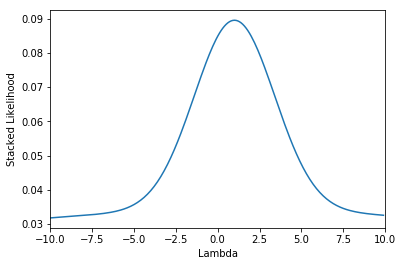

In [7]:
#Stacking the data
#average_list = []

averaged_list = []
for i in xrange(len(arr1)):
    mean = (arr1[i] +arr2[i] +arr3[i])/3 
    averaged_list.append(mean)

#averaged_list.append(averaged_values)
    
x = lambda_arr 
y = averaged_list
print len(averaged_list), len(x)
#pylab.semilogy(x,y) 
pylab.plot(x,y)
pylab.xlim(-10, 10, 0.01)
pylab.xlabel('Lambda')
#pylab.ylim(-.0003, .000, 0.001)
pylab.ylabel('Stacked Likelihood')    

In [13]:
peak = np.amax(arr1) 
pt10 = peak*(.1)
interval = np.where(arr1>pt10)[0]
#lambda_min = lambda[interval.min()]